**Lending Club Loan Analysis**

** Company information: **

Lending Club is a peer to peer lending company located at US. The investor provide funds for potential borrowers to earn a profit depending on the risk they take(e.g the borrowers credit score). Detailed info can be fund at : 
https://www.lendingclub.com

In this section, I am going to check the general information and features about the loan data from lending club 
1. exploration the data
2. check the distribution of each feature
3. get a general idea about the features related with loan amnt and other parameters

In [69]:
# load the useful package 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plotly visualization 
import  plotly.tools as tls
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from collections import Counter

% matplotlib inline


** Load the data from csv file and check the feature info**
Note1: can not load the data using"../inputData/loan.csv"

In [2]:
df = pd.read_csv('clean_data.csv',low_memory = False)
df_org = df.copy()
print('data size is :', df.shape)
df.info()
df.head()

data size is : (887379, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 62 columns):
Unnamed: 0                     887379 non-null int64
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null o

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_month,issue_year,last_pymnt_month,last_pymnt_year
0,0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Jan,2015.0
1,1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Apr,2013.0
2,2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Jun,2014.0
3,3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Jan,2015.0
4,4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Jan,2016.0


# Data exploration 
In this part, I will start exploring the loan data. There are several key factors we have to pay more attentions on. Our target is to check whether the loan is worth to invest. The most important thing that we care is whether the borrower will pay the money back.  In order to get a details understanding, I will analyze the data from the following aspect 

This section, we would like to explore the lending club's business status, and investigate the coustom components that used the lending club. Therefore, to help the Lending Club to catch more user in the future.For this purpose, we will analysis the business increase over years
1. Loan mount VS years
2. Loan status VS year
3. Total accumulated interest made from custom over years
4. prediction of next year's custom number and accumulated interest

what are the custom components?
1. custom distribution over state
2. custom empolyment distribution over different employment catalog
3. custom's income distribution 


In [20]:
# calculate the loan mount over the years
df_loan = df
a =df_loan.groupby(['issue_year']).sum().loan_amnt
print(a)
count = df_loan.issue_year.value_counts()
average = a/count
print(average)
# fitting the average 

issue_year
2007    4.977475e+06
2008    2.111925e+07
2009    5.192825e+07
2010    1.319926e+08
2011    2.616838e+08
2012    7.184110e+08
2013    1.981989e+09
2014    3.503830e+09
2015    6.417580e+09
Name: loan_amnt, dtype: float64
2007     8254.519071
2008     8825.428333
2009     9833.033516
2010    10528.240408
2011    12047.503568
2012    13461.709015
2013    14708.094134
2014    14870.177462
2015    15240.255561
dtype: float64


11 precent of the loan do not get fully found


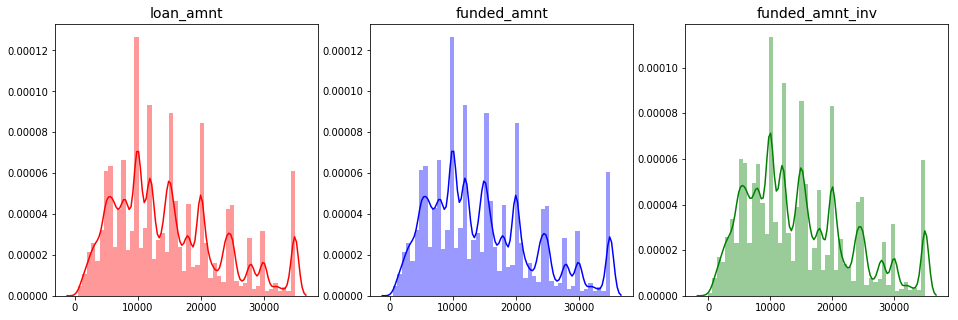

In [103]:
fig, ax  = plt.subplots(1,3,figsize = (16,5))
amountlist = ['loan_amnt','funded_amnt','funded_amnt_inv']
colorF = ['red','blue','green']
for i in range(0,3):
    sns.distplot(df_loan[amountlist[i]].values,ax = ax[i],color = colorF[i])
    title = amountlist[i]
    ax[i].set_title(title,fontsize = 14)

# check how many percent of the loan does not get fully found
precent = (len(df_loan[df_loan['loan_amnt']> df_loan['funded_amnt_inv']])/len(df_loan)) *100
print('%d precent of the loan do not get fully found'%precent)

we can see that the mean of the loan amnt is around 10000

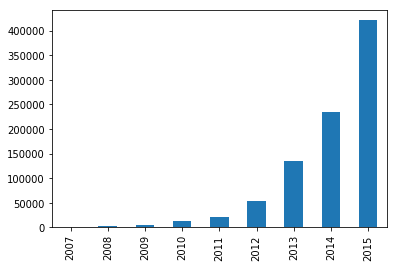

In [43]:
# issue number over the years
issueNO = df_loan.issue_year.value_counts().sort_index()
issueNO.plot(kind = 'bar')

Text(0,0.5,'Average loan amount issued')

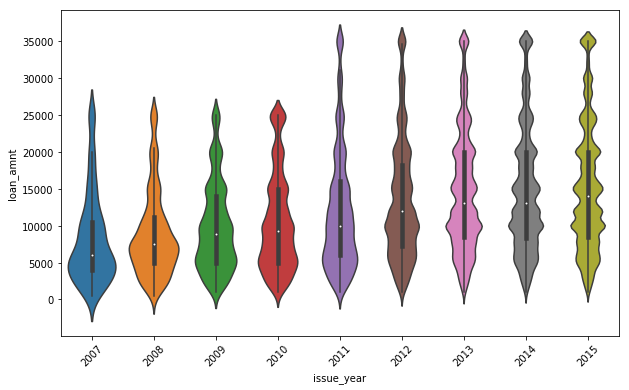

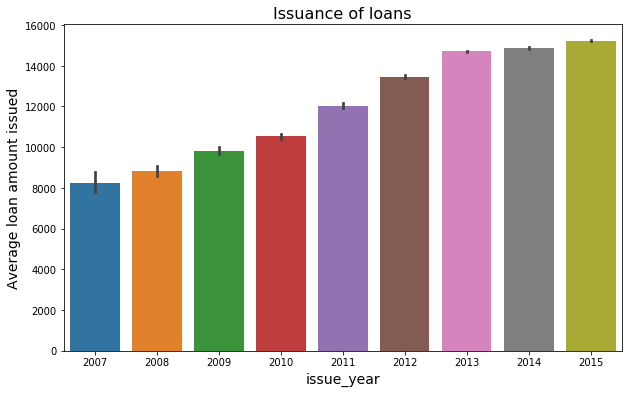

In [59]:
# loan amunt distribution
plt.figure(figsize = (10,6))
g2 = sns.violinplot(x="issue_year", y="loan_amnt", data=df_loan)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
# plot the issue loan over the years
plt.figure(figsize = (10,6))
g = sns.barplot(x= 'issue_year',y = 'loan_amnt',data = df_loan,palette = 'tab10')
g.set_title('Issuance of loans',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('Average loan amount issued',fontsize = 14)

Text(0,0.5,'Average int_rate')

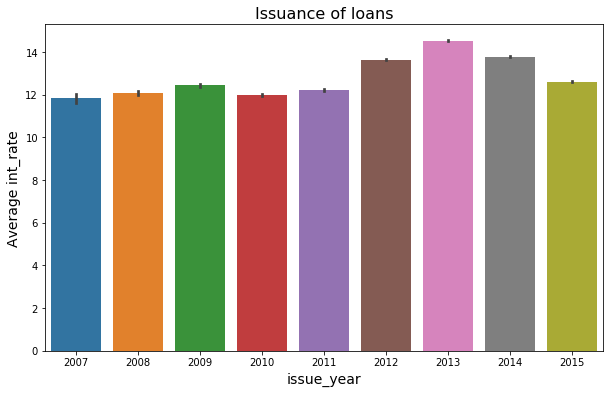

In [25]:
# amount over the last pymnt year
plt.figure(figsize = (10,6))
g = sns.barplot(x= 'issue_year',y = 'int_rate',data = df_loan,palette = 'tab10')
g.set_title('int_rate',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('Average int_rate',fontsize = 14)

[Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015')]

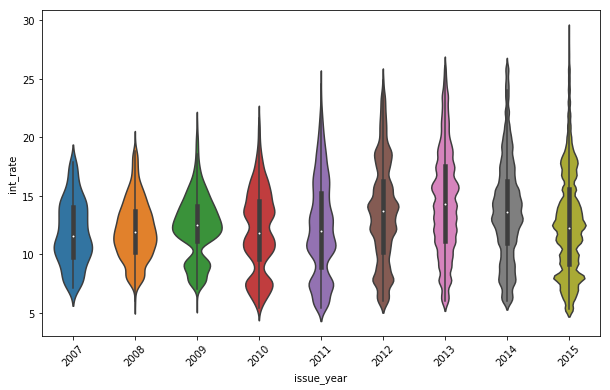

In [58]:
# we observed that the total number of the loan and average mount of the loan are increase over the years, however,
#the total recieved interest actually droped after 2013, in order to check what caused this problem, we will
# plot int_rate distribution over the years
plt.figure(figsize = (10,6))
g2 = sns.violinplot(x="issue_year", y="int_rate", data=df_loan)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

Text(0,0.5,'total_interest recieved')

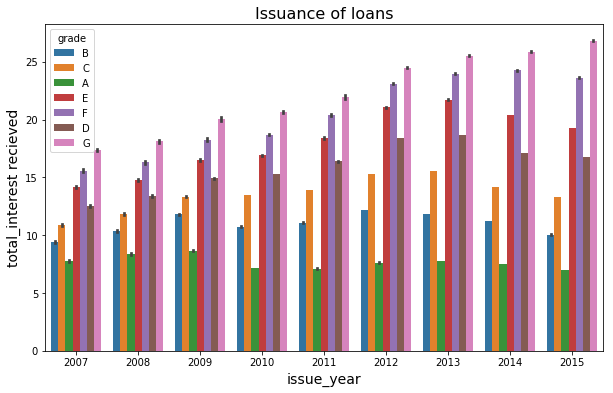

In [52]:
# averaged int rate changes over the year
plt.figure(figsize = (10,6))
g = sns.barplot(x= 'issue_year',y = 'int_rate',data = df_loan,hue = 'grade', palette = 'tab10')
g.set_title('Issuance of loans',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('total_interest recieved',fontsize = 14)

Text(0,0.5,'total_interest recieved')

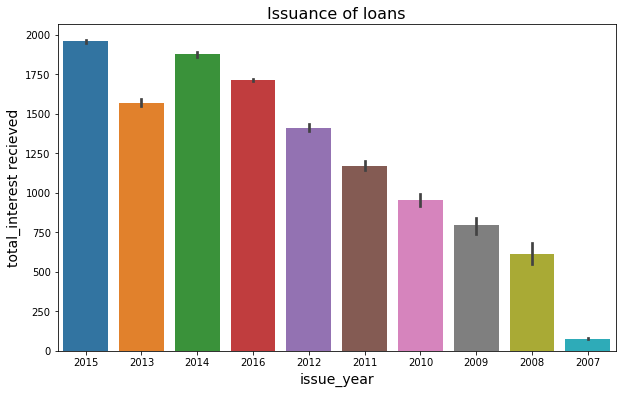

In [64]:
# averaged interest earn at each loan
plt.figure(figsize = (10,6))
g = sns.barplot(x= 'last_pymnt_year',y = 'total_rec_int',data = df_loan,palette = 'tab10')
g.set_title('Issuance of loans',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('total_interest recieved',fontsize = 14)

(844844, 62)


Text(0,0.5,'total_interest recieved')

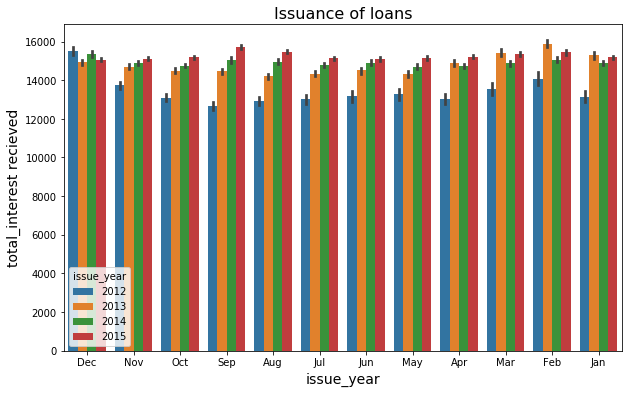

In [53]:
# averaged interest earn at each loan
datanew =df_loan[(df_loan['issue_year'] == '2013')|(df_loan['issue_year'] == '2014')|(df_loan['issue_year'] == '2015')|(df_loan['issue_year'] == '2012')] 
print(datanew.shape)
plt.figure(figsize = (10,6))
g = sns.barplot(x= 'issue_month',y = 'loan_amnt',data = datanew,hue = 'issue_year',palette = 'tab10')
g.set_title('Issuance of loans',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('total_interest recieved',fontsize = 14)

(844844, 62)


Text(0,0.5,'total_interest recieved')

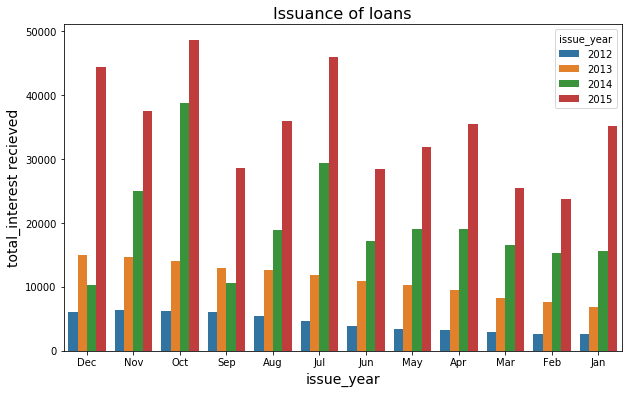

In [56]:
# averaged interest earn at each loan
#datanew =df_loan[(df_loan['issue_year'] == '2013')|(df_loan['issue_year'] == '2014')|(df_loan['issue_year'] == '2015')|(df_loan['issue_year'] == '2012')] 
print(datanew.shape)
plt.figure(figsize = (10,6))
g = sns.countplot(x= 'issue_month',data = datanew,hue = 'issue_year')
g.set_title('Issuance of loans',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('total_interest recieved',fontsize = 14)

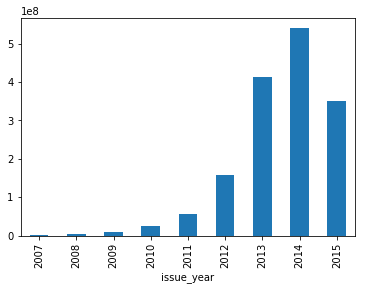

In [63]:
df_sum = 
# calcuate the total rec_int over the year
df_sum = df_loan.groupby(['issue_year']).sum()
# check the total interest recieved each year
df_sum.total_rec_int.plot(kind = 'bar')

# summary
1. the total loan numbers increased dramtically from 2007 to 2015, the increase follows a exponential trend, we expect have more borrower/investor will use the lending club to p2p actives
2. the averaged loan amount also increased the from 2007 to 2015. From 2007 to 2012, the averaged loan amount increased pretty fast with a ratio of ??, however, since 2013, the increse rate of the loan amount become much more stable. 
3. more and more interest rate can be chosen in recent years, however, we found that the mean of the interest rate is drop since 2013, which means the borrow will not really want to pay high interests. In 2013, the mean of interest get the maxmiumn value. 
4. even the mean of the interest rate decrease after 2014, however, the total amount the Lending club made is increased since the borrower increased a lot.

# Section two: the borrower distribution

In this section, we would like to check what is the distribution of the borrowers over different employment catalogs, employment length, their purpuse to borrow the money, and geological distribution. By analyzing these part,we are able to determine who is the potential costomer in the further. 

In [77]:
# check the distribution purpose of the loan
print('purpose count description')
tmp = ['purpose','issue_year']
cm  = sns.light_palette("green",as_cmap = True)
pd.crosstab(df_loan[tmp[0]],df_loan[tmp[1]]).style.background_gradient(cmap = cm)

purpose count description


issue_year,2007,2008,2009,2010,2011,2012,2013,2014,2015
purpose,,,,,,,,,
car,13,54,191,419,938,901,1049,1832,3466
credit_card,87,399,626,1545,2820,10365,32793,55522,102025
debt_consolidation,207,976,2194,5729,10670,30811,80603,143005,250020
educational,36,85,187,114,0,0,0,0,1
home_improvement,36,140,388,955,1680,2893,7400,13045,25292
house,8,26,72,104,216,418,675,750,1438
major_purchase,10,91,258,873,1079,1360,2299,3858,7449
medical,9,51,91,220,382,630,888,2331,3938
moving,15,31,67,213,303,399,638,1328,2420


In [70]:
 #First plot
trace0 = go.Bar(
    x = df_loan.emp_title.value_counts()[:40].index.values,
    y = df_loan.emp_title.value_counts()[:40].values,
    marker=dict(
        color=df_loan.emp_title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

In [82]:
 # plot the employ length 
trace0 = go.Bar(
    x = df_loan.emp_length.value_counts()[:].index.values,
    y = df_loan.emp_length.value_counts()[:].values,
    marker=dict(
        color=df_loan.emp_title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment length'
    ),
    title='Employment length'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

count    8.873750e+05
mean     7.502759e+04
std      6.469830e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64


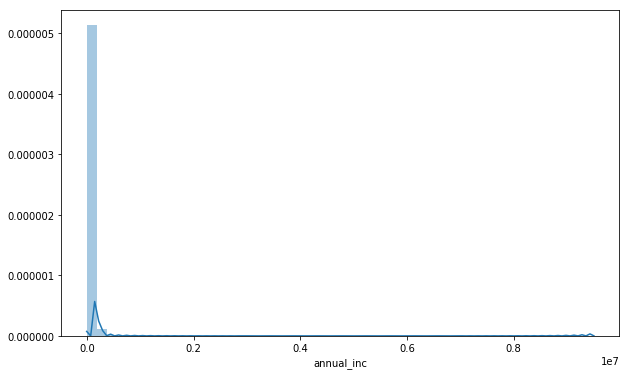

In [95]:
# check the income 
t = df_loan.annual_inc.apply(lambda x: x).dropna()
print(t.describe())
# plot the income distribution 
plt.figure(figsize = (10,6))
g = sns.distplot(t)

In [96]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [97]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.0,0.6,1.0,1.56,0.0,0.0,0.0,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.4,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64


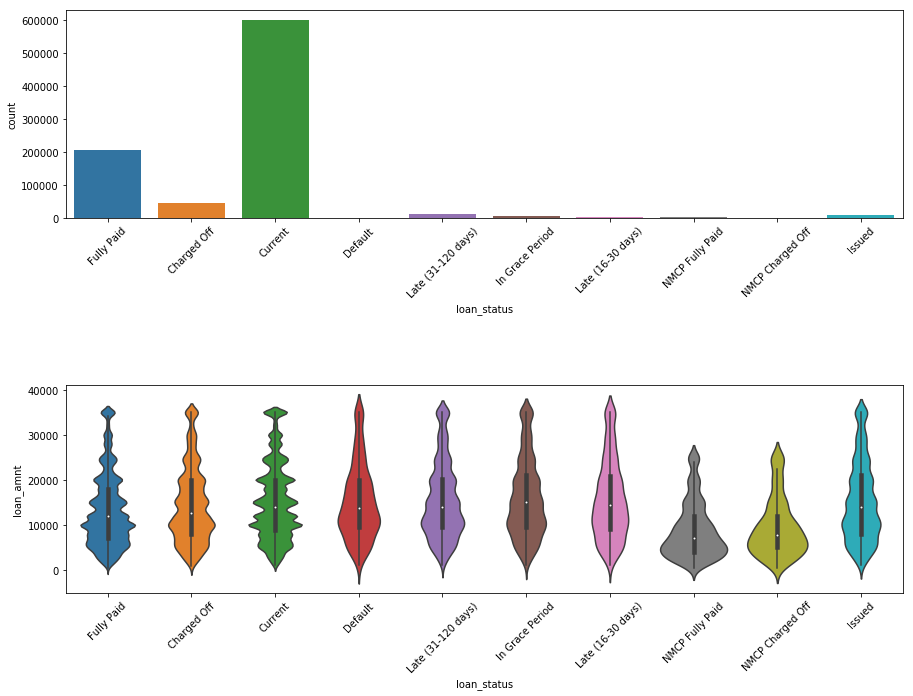

In [143]:
# type of loan
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'
print(df.loan_status.value_counts())
fig, ax =plt.subplots(2,1,figsize=(15,12))
plt.subplots_adjust(hspace = 0.8, top = 0.8)

g0 = sns.countplot(x="loan_status", data=df_loan,ax=ax[0])
g0.set_xticklabels(g0.get_xticklabels(),rotation=45)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df_loan,ax=ax[1])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.show()

In [117]:
# group the loan as bad loan and good loan and current loan
bad_loan = ["Charged off","Default","NMCP Fully Paid","NMCP Charged Off",
            "In Grace Period","Late (16-30 days)","Late (31-120 days)"]
df_loan['loan_condition'] = np.nan
def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return status
df_loan['loan_condition'] = df_loan['loan_status'].apply(loan_condition)

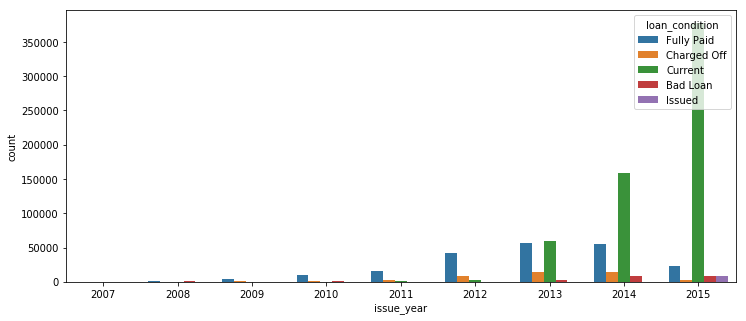

In [141]:
# get the idea about how the loan status change over the year
plt.figure(figsize = (12,5))
ax = sns.countplot(x='issue_year', hue="loan_condition", data=df_loan)
#plt.figure(figsize = (12,5))
#ax = sns.countplot(x='last_pymnt_year', hue="loan_condition", data=df_loan)
#ax.set_legend(loc = 'upright')

2007    1.708738
2008    0.631939
2009    0.137069
2010    0.100518
2011    0.005647
2012    0.008679
2013    0.057788
2014    0.153090
2015    0.405674
Name: issue_year, dtype: float64


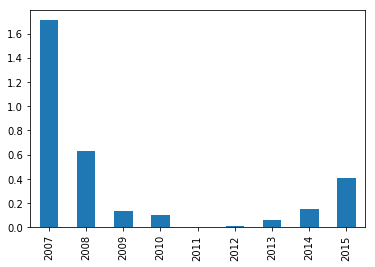

In [137]:
# calcuate the bad loan rate over the year 
bad_loan_year = df_loan[df_loan['loan_condition'] =='Bad Loan'].issue_year.value_counts()
fully_loan_year = df_loan[df_loan['loan_condition'] =='Fully Paid'].issue_year.value_counts()
#print(bad_loan_year)
#print(fully_loan_year)
rate = bad_loan_year/fully_loan_year
rate.plot(kind = 'bar')
print(rate)



Note: we calcuate the ratio between the Bad_Loan and Fully_charge, we can see that during the 2007 and 2008, the ratio is very high. This may cause by the economy crisis that a lot of people lost their job and were not able to pay off the loan